# SVM classification

librarys requried for implimenting SVM

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# loading the data by using read_csv
df = pd.read_csv("C:\\Users\\LDA\\Kaggel data\\UniversalBank.csv")

In [4]:
df.head() # seeing the top 5 data by using head

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# seeing the last 5 data 
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
df.columns # seeing the colums in data

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.dtypes # checking the data types of each columns

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
df.shape # checking the shape of the data

(5000, 14)

In [9]:
df.isnull().sum() # checking the null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

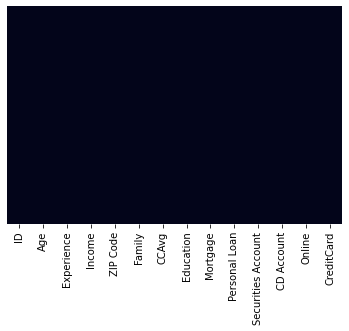

In [10]:
sns.heatmap(df.isnull(),data=df,yticklabels=False,cbar=False) # visulizing the null values 

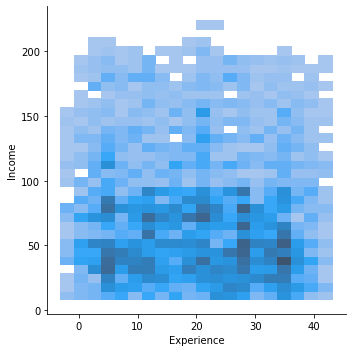

In [11]:
sns.displot(x= "Experience",y = "Income",data=df) # seeing the relationship  b/w two columns

<AxesSubplot:xlabel='Experience', ylabel='Income'>

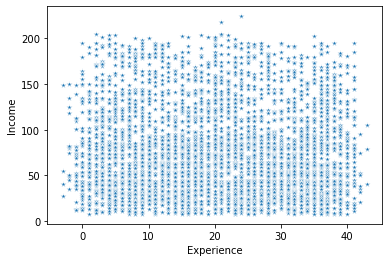

In [12]:
sns.scatterplot(x= "Experience",y = "Income",data=df,marker="*") # visulizing the relationship b/w experience and income 

<AxesSubplot:xlabel='Family', ylabel='Education'>

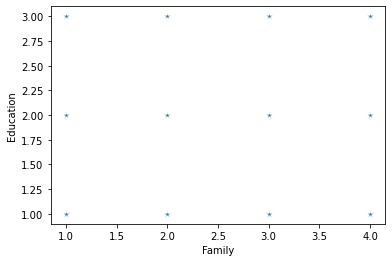

In [13]:
sns.scatterplot(x= "Family",y = "Education",data=df,marker="*") # checking the relationship b/w family and education

<AxesSubplot:>

C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


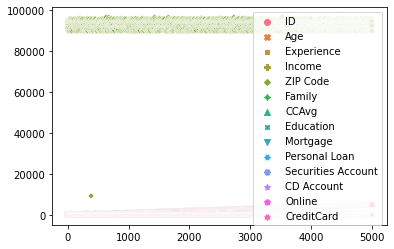

In [14]:
sns.scatterplot(data=df) # ploting the scatter on data

In [15]:
df1 = df[["Age","Experience","Income","Family","CCAvg","Mortgage","Personal Loan","Securities Account"]]

<AxesSubplot:>

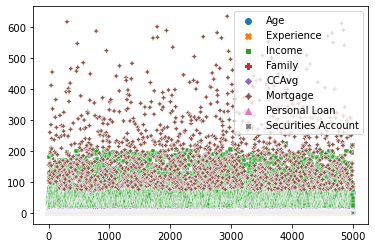

In [16]:
sns.scatterplot(data=df1)

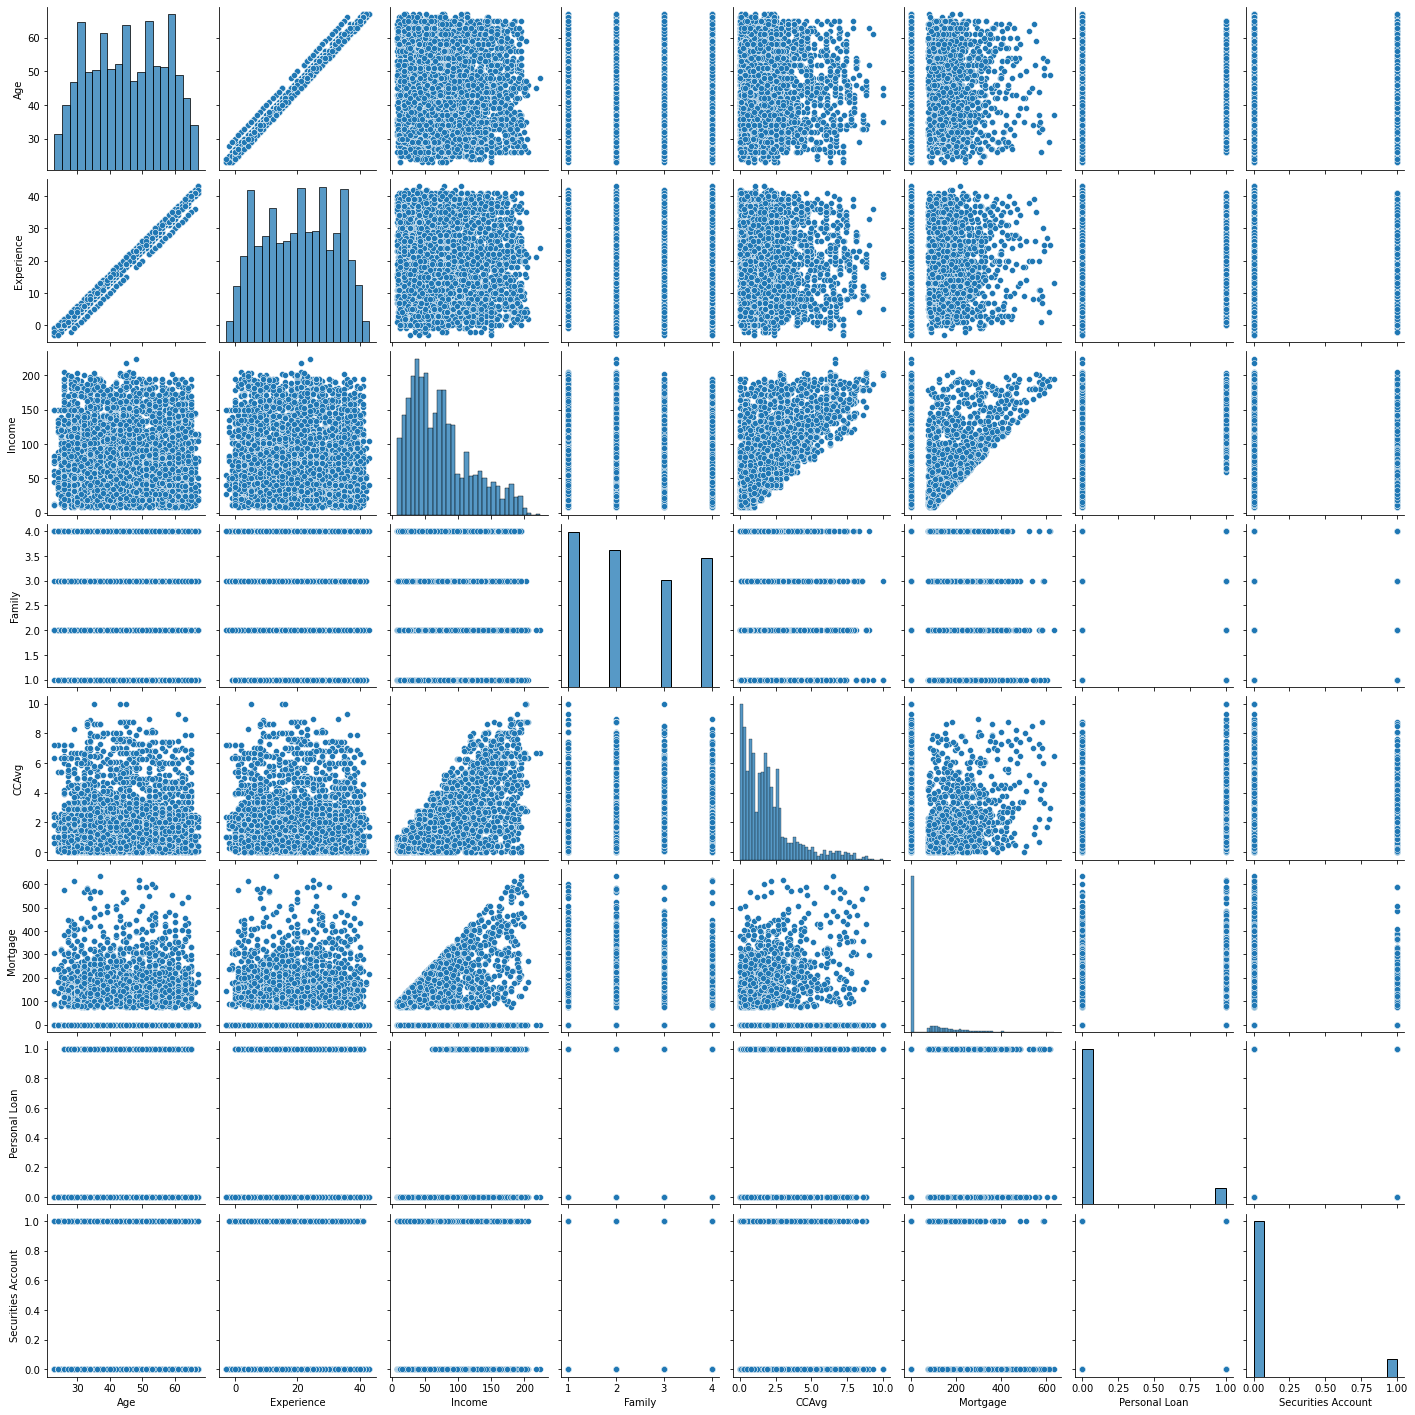

In [17]:
sns.pairplot(data=df1)

In [18]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# distribuing the data dependent and independent variable

In [23]:
inputs = df.drop(columns=["ID","CreditCard","CCAvg","CD Account","Online","Personal Loan","Securities Account"]) # spliting the data to independent variable
inputs.head()

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage
0,25,1,49,91107,4,1,0
1,45,19,34,90089,3,1,0
2,39,15,11,94720,1,1,0
3,35,9,100,94112,1,2,0
4,35,8,45,91330,4,2,0


<AxesSubplot:>

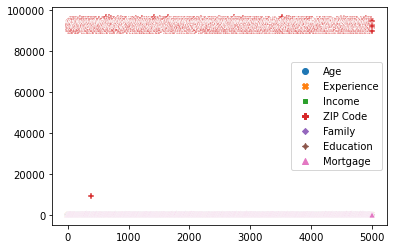

In [24]:
sns.scatterplot(data=inputs)

In [25]:
output = df.CreditCard
output.head()

0    0
1    0
2    0
3    0
4    1
Name: CreditCard, dtype: int64

# train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(inputs,output,train_size = 0.7)

In [27]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      Age  Experience  Income  ZIP Code  Family  Education  Mortgage
2743   32           8      22     94583       4          2         0
1942   61          36      29     90210       2          2         0
2712   31           7      32     91320       1          1         0
1064   41          17     138     95008       3          2         0
4931   57          27      55     95616       1          3         0
...   ...         ...     ...       ...     ...        ...       ...
3976   60          33      42     90277       4          2       194
2247   60          34      60     95616       1          3       103
1300   61          36      23     91754       2          2       103
4801   34          10      88     94404       2          1       121
3235   60          35      39     91711       2          3         0

[3500 rows x 7 columns]
      Age  Experience  Income  ZIP Code  Family  Education  Mortgage
2902   56          30      50     94022       4          2         0
2495   46

In [28]:
print(x_train.shape) # chekcing the data shape 
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 7)
(1500, 7)
(3500,)
(1500,)


# Model deployment 

In [29]:
model = SVC(kernel="linear") # implementing the linear in kernel

In [30]:
model.fit(x_train,y_train) # fiting the training data to model

SVC(kernel='linear')

In [55]:
model.fit(x_test,y_test) # fitting the test data to model

SVC(kernel='linear')

In [56]:
model.score(x_train,y_train) # accuracy for training data

0.706

In [31]:
model.score(x_test,y_test) # checking the accuracy on test data

0.7066666666666667

In [32]:
y_pred = model.predict(x_test) # prediction on the new data

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1060,    0],
       [ 440,    0]], dtype=int64)

# model deployment on polynaminal kernal

In [36]:
model1 = SVC(kernel = "poly")

In [37]:
model1.fit(x_train,y_train)

SVC(kernel='poly')

In [57]:
model1.fit(x_test,y_test)

SVC(kernel='poly')

In [58]:
model1.score(x_train,y_train)

0.7057142857142857

In [38]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
model.score(x_test,y_test)

0.7066666666666667

# Model deployment with rbf kernal

In [48]:
model2  = SVC(kernel = "rbf")

In [49]:
model2.fit(x_train,y_train)

SVC()

In [59]:
model2.fit(x_test,y_test)

SVC()

In [60]:
model2.score(x_train,y_train)

0.7057142857142857

In [50]:
model.score(x_test,y_test)

0.7066666666666667

# Classification report 

In [51]:
from sklearn.metrics import classification_report

In [54]:
classification_report(y_test,y_pred)

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.71      1.00      0.83      1060\n           1       0.00      0.00      0.00       440\n\n    accuracy                           0.71      1500\n   macro avg       0.35      0.50      0.41      1500\nweighted avg       0.50      0.71      0.59      1500\n'